# Lab 6: An End-to-End ML project

# Introduction

In this lab we'll apply all the techniques we have learnt so far in the class for a prediction exercise, starting from raw and messy data and ending with a learnt predictive model that we can deploy. This will illustrate common practices of ML projects, how various techniques fit together, and help us fill in some of the gaps that we come across in the process. You may want to use this notebook as a template for your class project (or any other predictive modeling project you embark on in the future).



## Scenario: Real Estate Investment Strategy - District-Level Median House Price Prediction

You're on the analytics team at "Golden State Properties," tasked with guiding investment strategies across various districts in California. The firm relies on savvy investments based on accurate, district-level median house price predictions to maximize their portfolio's performance.

In the past, the firm estimated district-level prices using a combination of manual appraisals and basic statistical models, which were slow and inaccurate. These methods struggled to account for economic trends, local amenities, demographic shifts, etc., leading to frequent misestimations and missed opportunities. Manual prediction of such prices have a Root Mean Square Error (RMSE) of about **$60,000**.

To address these challenges, you turn to the California housing dataset, which includes key indicators like median income, housing age, average rooms per household, and population per district.

You aim to learn a predictive model based on this dataset that can accurately predict median house price in a district. But before you can deploy it the management would like to know the prediction accuracy it can expect when deploying this model to predict prices in future. They also very much hope that it is substantially lower than the error of current manual prediction.

If your efforts are successful, with the model's predictions, the firm can identify districts with potentially undervalued or overvalued properties, informing their investment decisions.


**Task:** *Predict the median house price in Californian districts, given a number of features from these districts.*


## Download and Explore the `Housing.csv` Data

The dataset contains attributes and median housing prices of districts (also referred to as 'blocks') in CA. Here is a brief description of the columns.


| Column title       | Description                                                  |
| :----------------- | :----------------------------------------------------------- |
| `longitude`        | A measure of how far west a house is; a more negative value is farther west |
| `latitude`         | A measure of how far north a house is; a higher value is farther north |
| `housingMedianAge` | Median age of a house within a block (in years); a lower number is a newer building |
| `totalRooms`       | Total number of rooms within a block                         |
| `totalBedrooms`    | Total number of bedrooms within a block                      |
| `population`       | Total number of people residing within a block               |
| `households`       | Total number of households, a group of people residing within a home unit, for a block |
| `medianIncome`     | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| `medianHouseValue` | Median house value for households within a block (measured in US Dollars) |
| `ocean_proximity`  | A string variable showing if the property is close to ocean. |


This dataset is hosted on course folder at `Slides/Data`. We can directly read it from there.
Let's do an exploratory data analysis (EDA) as well.

In [7]:
import numpy as np
import pandas as pd

file_url = 'https://drive.google.com/uc?export=download&id=1NL9jMOXOxmG88N_Ih5FeDPZOVmlFXcu6'
housing = pd.read_csv(file_url)
housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


All but `ocean_proximity` are numeric.
`total_bedrooms` column has fewer non-null values than the number of rows. This suggests that there are some null or missing values in this column. We'll have to consider what to do about them.


The total bedrooms and rooms are in hundreds and thousands because they are the total number of rooms in the district -- an odd variable. It's questionable whether it'll be any good at predicting price of individual houses in the current form. We'll consider how to make it usable shortly.

Some odd district has only one household and 3 people in it. We don't have to necessarily do anything special for them though.

Let's examine the only categorical feature present: `ocean_proximity`.

In [9]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Each values describes the location of a district relative to the ocean:

1. `NEAR OCEAN`: Districts that are close to the ocean.
1. `<1H OCEAN`: Districts that are not very close to ocean, but less than an hour's drive from the ocean.
1. `ISLAND`: Districts located on islands.
1. `NEAR BAY`: Districts that are in the vicinity of the San Francisco Bay.
1. `INLAND`: Districts that are inland and not close to the ocean.

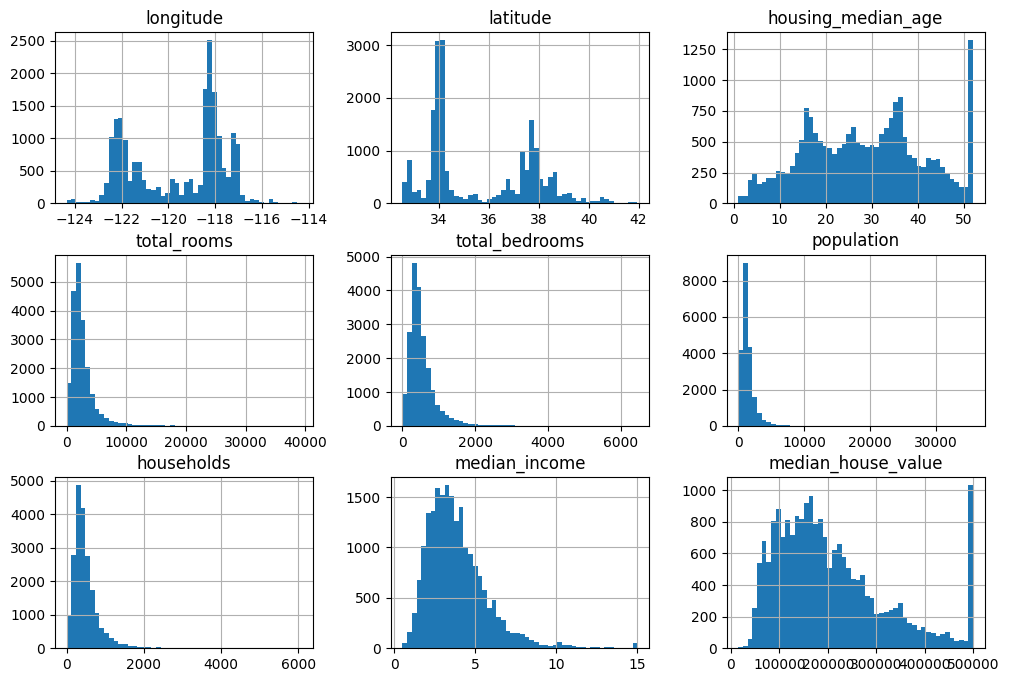

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

The spikes at the right end of population and house_value suggest that the column may have been 'top coded': median house ages of more than 52 years are recorded as 52 years and the district with median income more than \$150,000 are recorded to have income of \$150,000. Top coding is typically done to protect the privacy of entities or protect their sensitive attributes.

Why do we have two peaks in longitude and latitude histograms? The scatters will offer some clues.

### Visualizing Geographical Data

Let's scatter the latitude against longitude.

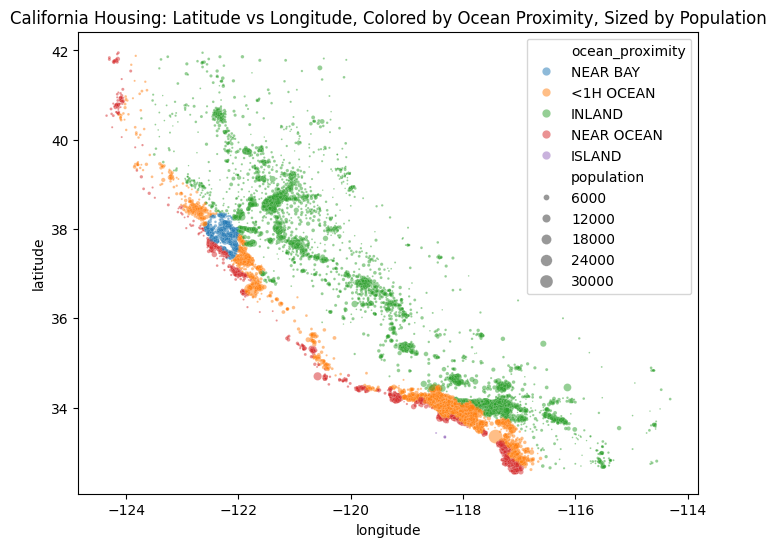

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='ocean_proximity',
                size='population', sizes=(1, 100), alpha=0.5)
plt.title('California Housing: Latitude vs Longitude, Colored by Ocean Proximity, Sized by Population')
plt.legend(scatterpoints=1)
plt.show()


What do you see in this scatter?

### Looking for Correlations

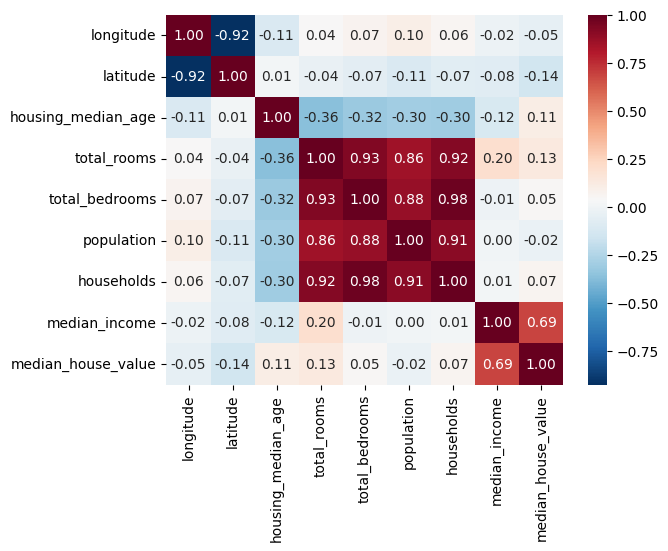

In [12]:
import seaborn as sns

corr_matrix = housing.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r');
  # annot:place the numbers in the heatmap, fmt:number of decimal, cmap: blue to red with white at 0

**Question**

1. Why is there a strong negative correlation between latitude and longitude?
1. Why do rooms, population, and households have strong correlation among them?

#### Answers


1. It has to do with how CA looks like -- it occupies land diagonally. Specifically, the shoreline is diagonal and most people live by the shore. Thus, as x (longitude) increases, y(latitude) tends to decrease. This results in a strong negative correlation.
1. Larger districts have more people, with more rooms and households. Since these are agreegate variables they are all larger for larger districts and small for smaller districts. This results in a strong positive correlation.


### Visualize correlation through pairplots/scatter-matrices

We choose only one among the variables that are highly correlated (`households`). We also skip the longitude and latitude as we plotted them before.

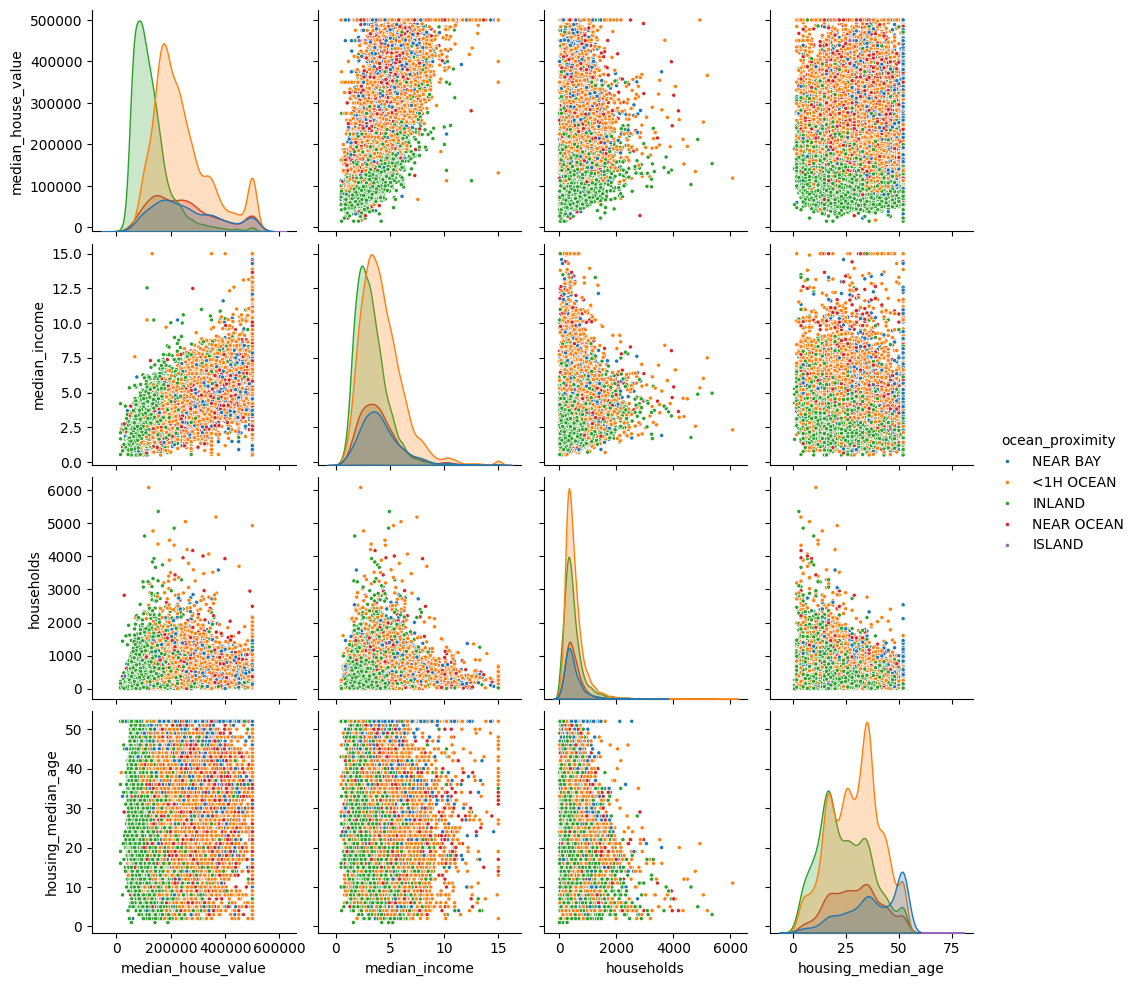

In [13]:
import seaborn as sns
attributes = ["median_house_value", "median_income", "households", "housing_median_age", "ocean_proximity"]
sns.pairplot(housing[attributes], hue='ocean_proximity', markers='.');

We can get a few insights from these plots:
1. Inland districts are cheaper
1. They are also newer, while those near the bay are older.

For some axes, there is a weird straight edge (house value, income). Why is that?

## Create a Test Set

Before doing much more, let's set aside a test data. All our modeling fitting, tuning, and selection are going to be based on the training data. In the end, before deploying, we'll estimate the generalization error on test data.

Let's separate the target (note that `train_set.drop()` creates a copy of `train_set` without the column, it doesn't actually modify `train_set` itself, unless you pass `inplace=True`):

In [14]:
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"].copy() # in case we modify values in y and don't want to affect original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Prepare Data Processing for Machine Learning

In this section, we'll explore various data transformation and feature engineering on a copy of the dataset. But, we'll not make any changes to the dataset itself. Instead, we'll make a note of preprocessings that we want to carry out and use it to build a pipeline later.

## Experimenting with Attribute Combinations

Total number of rooms may not be very meaningful when we are predicting the median price of a house. Let's normalize it and other similar columns.

In [15]:
X_train_copy = X_train.copy(); # experiment on a copy of the training data
y_train_copy = y_train.copy();


X_train_copy["rooms_per_house"] = X_train_copy["total_rooms"] / X_train_copy["households"]
X_train_copy["bedrooms_ratio"] = X_train_copy["total_bedrooms"] / X_train_copy["total_rooms"]
X_train_copy["people_per_house"] = X_train_copy["population"] / X_train_copy["households"]

X_train_copy[["rooms_per_house", "bedrooms_ratio", "people_per_house"]].head()


,rooms_per_house,bedrooms_ratio,people_per_house
19226,8.836394,0.239184,2.005008
14549,2.900128,0.358940,4.385403
9093,3.983416,0.263114,4.693201
12213,7.472036,0.135030,2.729306
12765,6.716374,0.151067,2.546784


Again, we are noting what to do in the pipeline, without changing the data here.

## Data Cleaning

The `total_bedrooms` column has a few missing values, recorded as `NaN` (Not a Number). These are sometimes referred to as null values.

Let's examine those records.

In [16]:
null_rows_idx = X_train_copy["total_bedrooms"].isnull()
X_train_copy[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
16478,-122.00,37.36,17.0,2070.0,NaN,797.0,275.0,8.6155,<1H OCEAN,7.527273,NaN,2.898182
13086,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,4.254021,NaN,1.973861
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,6.367713,NaN,2.542601
7901,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,5.511509,NaN,2.657289
15109,-118.30,33.73,42.0,1731.0,NaN,866.0,403.0,2.7451,NEAR OCEAN,4.295285,NaN,2.148883
...,...,...,...,...,...,...,...,...,...,...,...,...
4333,-118.50,34.17,37.0,880.0,NaN,369.0,155.0,4.1429,<1H OCEAN,5.677419,NaN,2.380645
11218,-118.32,34.09,44.0,2666.0,NaN,2297.0,726.0,1.6760,<1H OCEAN,3.672176,NaN,3.163912
5251,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,4.707668,NaN,1.317891
19721,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN,4.099870,NaN,2.418936


For many, but not all, predictive models the null values must be removed from data. We can consider three options:

1. drop the rows in which the null values are present
1. drop the column containing the null value (`total_bedrooms`)
1. replace the null values with something else (imputation)

What are the pros and cons? Which option would you recommend?

Let's start with the relatively simple strategy of replacing `NaN`s with the median for the column (imputing median):

In [17]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
  # we set_output on sklearn transformers during our exploration, so it produces data frame
  #  (instead of numpy arrays or whatever is the default for the transformer).
X_train_copy_num = X_train_copy.select_dtypes(include=[np.number])
  # Separating out the numerical features to use the `"median"` strategy
  #  (as it cannot be calculated on categorical features like `ocean_proximity`)
X_train_copy_imp_df = median_imputer.fit_transform(X_train_copy_num)
X_train_copy_imp_df[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
16478,-122.00,37.36,17.0,2070.0,435.0,797.0,275.0,8.6155,7.527273,0.203114,2.898182
13086,-118.40,34.17,24.0,6347.0,435.0,2945.0,1492.0,3.3545,4.254021,0.203114,1.973861
20325,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,6.367713,0.203114,2.542601
7901,-117.30,34.05,6.0,2155.0,435.0,1039.0,391.0,1.6675,5.511509,0.203114,2.657289
15109,-118.30,33.73,42.0,1731.0,435.0,866.0,403.0,2.7451,4.295285,0.203114,2.148883


Notice that all rows that had `NaN` for `total_bedrooms` have been replaced by the same value -- the median for the column (435).

There are other smarter imputation strategies, such as `IterativeImputer`. It learns a model to predict missing values in a column from all other columns. The "training data" would be the rows on which the value is NOT missing.

`IterativeImputer` proceeds in the following steps:
1. Initialize each missing value to a constant value for the column (the mean by default).
1. Iterate over the features in some order, in each iteration doing the following for each feature:
    1. fit a predictive model model to predict the feature from all other, using the records without missing values for the feature
    1. predict the missing values in that feature using the fitted model

Iterate, up to 10 times by default, predicting the same value multiple time, to move away from the effect of initialization.

In [18]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer().set_output(transform="pandas")
X_train_copy_imp_df = iter_imputer.fit_transform(X_train_copy_num)
X_train_copy_imp_df[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
16478,-122.00,37.36,17.0,2070.0,250.714547,797.0,275.0,8.6155,7.527273,0.128649,2.898182
13086,-118.40,34.17,24.0,6347.0,1599.974027,2945.0,1492.0,3.3545,4.254021,0.277598,1.973861
20325,-118.88,34.17,15.0,4260.0,755.896684,1701.0,669.0,5.1033,6.367713,0.187424,2.542601
7901,-117.30,34.05,6.0,2155.0,482.803686,1039.0,391.0,1.6675,5.511509,0.240882,2.657289
15109,-118.30,33.73,42.0,1731.0,441.100722,866.0,403.0,2.7451,4.295285,0.248192,2.148883


Now, we note that the `total_bedrooms` for each district with missing values is not a constant, but varies from row to row based on the values of other attributes (e.g., larger for districts with more people).

## Feature Scaling and Custom Transformers

It's often a good idea to normalize the columns. The standard scaler subtracts mean and divides standard deviation for each each column to normalize it.

In [19]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().set_output(transform="pandas")
X_train_copy_num_std_scaled_df = std_scaler.fit_transform(X_train_copy_num)
X_train_copy_num_std_scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
19226,1.562349,-0.796482,-0.930283,1.233918,1.753685,-0.194834,0.269438,-1.144971,1.450462,0.441325,-0.092728
14549,0.598196,-0.791805,0.022176,-0.165330,0.666324,1.761269,0.751073,-0.788029,-1.069606,2.483400,0.106152
9093,0.773043,-0.726324,0.180919,-0.102022,0.231859,1.237941,0.280023,-0.805912,-0.609727,0.849380,0.131868
12213,-1.220205,0.765696,-0.136567,0.331431,-0.202605,-0.178122,-0.132807,2.584939,0.871264,-1.334696,-0.032213
12765,-1.365078,0.882625,0.260291,-0.150543,-0.452242,-0.485083,-0.410673,2.211629,0.550470,-1.061240,-0.047463


Though standardization brings the columns to similar range, it doesn't change the shape of the distribution. For example, a feature is heavily skewed, standardization leaves it skewed. Other transformation of the features, e.g., taking log, can sometimes help by making the distribution closer to a Normal distribution. This reduces the outsized impact of outliers (e.g., effect of very large districts) by bringing them closer to the rest of the districts.

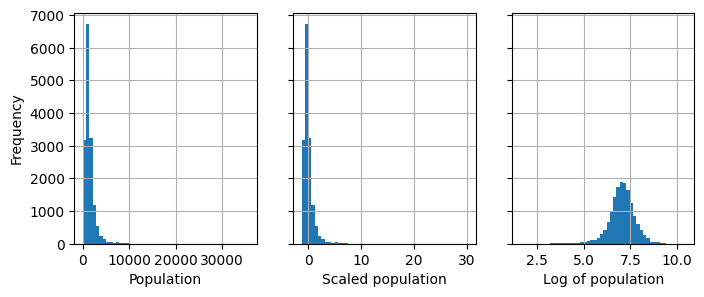

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

X_train_copy_num["population"].hist(ax=axs[0], bins=50)
X_train_copy_num_std_scaled_df["population"].hist(ax=axs[1], bins=50)
X_train_copy_num["population"].apply(np.log).hist(ax=axs[2], bins=50)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Scaled population")
axs[2].set_xlabel("Log of population");

Again, we'll do it in a pipeline and for that we need a transformer. `log` is not available as a standard transformer. So, we must create one:

In [21]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log).set_output(transform="pandas")
log_pop_df = log_transformer.transform(X_train_copy[["population"]])
log_pop_df.head()

,population
19226,7.090910
14549,8.138857
9093,7.948032
12213,7.106606
12765,6.769642


We can also create FunctionTransformer with custom functions. For example, earlier we noted that perhaps some columns such as `total_rooms` need to be divided by `households` to be meaningful. We can define a transformer that divides one column by another.

In [22]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
  # when passed in any matrix, divide the first column by second
ratio_transformer.transform(np.array([[1., 2.],
                                      [3., 4.]]))

array([[0.5 ],
       [0.75]])

We can create even more sophisticated transformers. For example, we my hypothesize that latitudes and longitudes themselves are less meaningful than the closeness/similarity to certain geographic centers.

In the following block, we'll create a custom transformer that will take two columns (longitude and latitude), cluster them into specified number of groups, and output the closeness/similarity (a quantity that reduces with distance) of each district (longitude, latitude) from each cluster center.

The particular function that we use to measure similarity is Radial Basis Function defined as:

$$
Κ(x,y) = e^{-γ ||x-y||^2}
$$

where, $||x-y||$ is the Eucledian distance between $x$ and $y$. $γ>0$ controls how quickly the similarity drops off with distance.

**Quiz:** *What happens to the simiarity for one pair of points (i.e., for the same eucledian distance) when you increase $γ$?*

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    # Inherits BaseEstimator to use as a custom scikit-learn estimator, gaining methods like set_params and get_params.
    # Inherits TransformerMixin for compatibility with scikit-learn pipelines and the fit_transform method.
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        # Initializes the custom transformer with default parameters for clustering and RBF kernel.
        self.n_clusters = n_clusters      # Number of clusters to form.
        self.gamma = gamma                # Coefficient for RBF.
        self.random_state = random_state  # Random state for reproducibility.

    def fit(self, X, y=None):
        # Fit method to perform k-means clustering on X.
        # Creates a KMeans instance with the specified number of clusters and random state.
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X)   # Fits the KMeans model to the data.
        return self           # Returns self to allow method chaining.

    def transform(self, X):
        # Transform method to calculate the RBF kernel between X and the k-means cluster centers.
        # This method effectively computes the similarity of each sample in X to each cluster center.
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        # Provides output feature names for the transformation, aiding in interpretability.
        # Useful when the transformed data is passed to other estimators or inspected.
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [24]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42).set_output(transform="pandas")
similarities = cluster_simil.fit_transform(X_train_copy[["longitude", "latitude"]])
similarities.head().round(2)

,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
19226,0.03,0.00,0.0,0.22,0.0,0.00,0.00,0.00,0.20,0.65
14549,0.98,0.00,0.0,0.61,0.0,0.00,0.02,0.00,0.06,0.00
9093,0.92,0.00,0.0,0.85,0.0,0.00,0.01,0.00,0.10,0.01
12213,0.00,0.84,0.0,0.00,0.0,0.05,0.00,0.61,0.00,0.00
12765,0.00,0.60,0.0,0.00,0.0,0.06,0.00,0.87,0.00,0.00


(RBF considers two points to be less similar to each other as $γ$ increases.)

Our custom ClusterSimilarity transformer has taken each longitude and latitude pair and converted it to ten similarities from centers of district clusters.

We can visualize these in the following manner:

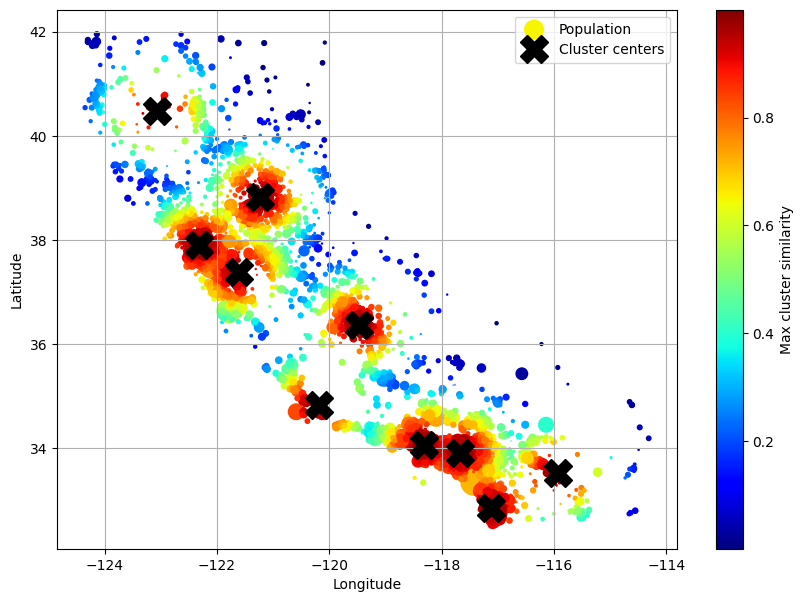

In [25]:
# Plot the cluster centers to illustrate

X_train_renamed = X_train_copy.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})  # improve displayed labels
X_train_renamed["Max cluster similarity"] = similarities.max(axis=1)
  # for each district track the similarity to the closest center, to show if they are close to any

X_train_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=X_train_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",  # color by closeness to the closest center
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 0],
         cluster_simil.kmeans_.cluster_centers_[:, 1],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right");

## Transformation Pipelines

Let's put all these steps together into a preprocessing pipeline.

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore") # unknown values in test → 0 for all 0/1 cols.
  )

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # a fixed string to be appended to the name of the ratio pipeline step

ratio_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline, ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline, ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline, ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, ["ocean_proximity"]),
    ],
    remainder=default_num_pipeline, force_int_remainder_cols=False # one column remaining: housing_median_age
)

preprocessing

ColumnTransformer(force_int_remainder_cols=False,
                  remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x780c995c9...
                                                                      func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

Test if it's preprocessing:

In [27]:
print(X_train.shape)
X_train_prepared = preprocessing.fit_transform(X_train)
print(X_train_prepared.shape)

(15480, 9)
(15480, 24)


We supplied 9 columns, but got back 24! Why?

Note that we typically must provide a DataFrame to a pipeline as we often rely on the named columns for our transformation (e.g., "latitude", "ocean_proximity", etc. above). Numpy array doesn't have these column names, thus aren't suitable. However, as their output, most transformers and pipelines prouduce numpy arrays, even when supplied a DataFrame. Thus we need a way to know what each returned column corresponds to. Fortunately we can get back the column names on the transformed data by calling `get_feature_names_out()` on the pipeline.

In [28]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

These names can then be used to construct a DataFrame from the transformed data:

In [29]:
X_train_prepared_df = pd.DataFrame(X_train_prepared, # the numpy array containing the processed data
                                   columns=preprocessing.get_feature_names_out(), # column names
                                   index=X_train.index # row numbers/labels
                                  )
X_train_prepared_df.head()

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
19226,0.391761,1.450462,-0.092728,1.498295,1.258304,0.093174,0.569300,-1.528175,2.945773e-02,1.745574e-17,...,3.439315e-07,1.515796e-22,2.006002e-01,6.513824e-01,0.0,1.0,0.0,0.0,0.0,-0.930283
14549,2.260054,-1.069606,0.106152,0.893115,0.134910,1.507539,0.930397,-0.809039,9.833615e-01,2.031824e-10,...,1.628681e-02,2.763317e-14,6.483534e-02,2.192647e-03,1.0,0.0,0.0,0.0,0.0,0.022176
9093,0.765091,-0.609727,0.131868,0.548987,0.212634,1.249992,0.578358,-0.839804,9.171229e-01,4.814413e-11,...,5.085429e-03,4.600000e-15,9.983561e-02,9.310281e-03,0.0,1.0,0.0,0.0,0.0,0.180919
12213,-1.233118,0.871264,-0.032213,0.087919,0.648949,0.114359,0.170925,1.971146,3.799265e-11,8.355604e-01,...,9.840661e-05,6.139955e-01,1.435052e-19,6.905028e-23,1.0,0.0,0.0,0.0,0.0,-0.136567
12765,-0.982934,0.550470,-0.047463,-0.270285,0.153477,-0.340426,-0.193486,1.792642,7.709305e-13,6.034120e-01,...,8.765516e-06,8.656579e-01,8.000736e-22,2.688715e-25,0.0,0.0,0.0,0.0,1.0,0.260291


# Select and Train a Model

## Preliminary Evaluation Using Cross-Validation

Staying within the training data let's measure cross validation errors as they are better estimate of the generalization errors of these models.

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())

# First for the linear regression
lin_cv_rmses = -cross_val_score(lin_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Linear Regression Cross-Validation RMSE: {lin_cv_rmses.mean():.0f}")

Average Linear Regression Cross-Validation RMSE: 69867


In [31]:
# Then the decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

tree_cv_rmses = -cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Decision Tree Regression Cross-Validation RMSE: {tree_cv_rmses.mean():.0f}")

Average Decision Tree Regression Cross-Validation RMSE: 68134


So, decision tree regressor is a little better but not by much. Let's try a little more advanced, ensemble based, tool:

**Warning:** the following cell may take a few minutes to run:

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(n_estimators=10, random_state=42))
forest_rmses = -cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Random Forest Regression Cross-Validation RMSE: {forest_rmses.mean():.0f}")

Average Random Forest Regression Cross-Validation RMSE: 51029


Much better! The RMSE is now lower than what the firm obtained from manual prediction. Thus, we may have a predictive model that improves upon the current practice. We should check if the improvement is statistically significant.

# Exercise

## 1. Bootstrap to obtain uncertainty

Is the test error for the model obtained at the best hyperparameter values, statistically significantly lower than 60,000? To determine carry out bootstrap with 30 samples to measure standard deviation of the RMSE.

For each step:
1. Draw a random sample with replacement
1. Refit the model to the sampled data
1. Predict on the original test data and capture the RMSE

If the mean RMSE is more than two standard deviation away from 60,000, or if more than 95% of the 30 RMSEs are less than 60,000, then we can conclude that this low RMSE is not due to random luck.

In [33]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

full_pipeline = make_pipeline(preprocessing, RandomForestRegressor(n_estimators=10, random_state=42))

full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)
base_rmse = mean_squared_error(y_test, y_pred)
print("Base RMSE:", base_rmse)

# Bootstrap
n_bootstrap = 30
rmse_scores = []

for i in range(n_bootstrap):
    X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=i)
    full_pipeline.fit(X_resampled, y_resampled)
    y_pred_boot = full_pipeline.predict(X_test)
    rmse_boot = mean_squared_error(y_test, y_pred_boot)
    rmse_scores.append(rmse_boot)

rmse_scores = np.array(rmse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"\nBootstrap Results ({n_bootstrap} samples):")
print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Std of RMSE: {std_rmse:.2f}")

below_60000 = np.sum(rmse_scores < 60000)
print(f"RMSE < 60000: {below_60000}/{n_bootstrap} ({below_60000/n_bootstrap:.1%})")

if (mean_rmse + 2*std_rmse < 60000) or (below_60000 / n_bootstrap > 0.95):
    print("\n Conclusion: The model RMSE is statistically significantly lower than 60,000.")
else:
    print("\n Conclusion: The model RMSE is not significantly lower than 60,000.")


Base RMSE: 2456575508.25469


KeyboardInterrupt: 

## 2. Alternative ratio formulations

Consider a few other ratios of the district level aggregate variables that might help predict median house prices. Modify the pipeline to incorporate them. Repeat the cross validations for the random forest regression to see if it improves prediction performance.

# Fine-Tune Your Model

We can further refine the best obtained pipeline using random forest through hyperparameter tuning.

## Grid Search

Let's start with grid search. We saw last time that grid search we need to set values for each hyperparameter of the pipeline. To do that we need to know the names of each step. These can be accessed by displaying the pipeline and expanding the top line.

In [ ]:
display(forest_reg)

We can see that 'columntransformer' is the name of the first step and 'randomforestregressor' is that of the second. Within that we have `geo` as part of the column transformer and `max_features` as an attribute of the random forest. Using these let's explore the following two hyper-parameters:
1. Number of clusters to use in preprocessing
1. Number of features to consider in Random Forest (we'll learn more about how they are used later)

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = [
    {'columntransformer__geo__n_clusters': [5, 10, 15],
      # Really guessing here: perhaps 10 to 20 clusters will suffice
     'randomforestregressor__max_features': [4, 6, 8]},
      # we have 24 to 34 features in the processed data, so that's the upper limit.
      # Typically, sqrt or log of the number of features is used to determine this parameter.
      # So, our numbers are in the right range.
    # we could start another { 'parameter set' } here. Multiple such parameter sets are just pooled
    # together. That is we don't take all possible combinations across sets. This allows us to
    # explore multiple grids.
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error')
  # Grid search (and most of sklearn) assumes that greater score is better.
  # Hence, they supply and we use negative of RMSE.
grid_search.fit(X_train, y_train)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

Can randomized search improve upon it?

## Randomized Search

With grid search we couldn't explore a very large range without incurring significant cost. But we might be able to do so using randomized search. Let's try the same number of hyperparameter combinations, but picked at random from a much wider range. Since we are evaluating same number of hyperparameters, our running time should be similar.

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = [
    {'columntransformer__geo__n_clusters': randint(low=3, high=50),
                  'randomforestregressor__max_features': randint(low=2, high=20)},

    {'columntransformer__geo__n_clusters': randint(low=60, high=100),
                  'randomforestregressor__max_features': randint(low=30, high=50)},

                  ]
  # we could have provided a list of dictionares too: it'd sample a dictionary first, then sample
  # hyperparameters within the dictionary.

rnd_search = RandomizedSearchCV(
    forest_reg, param_distributions=param_distribs, n_iter=9, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X_train, y_train)

# Let's check the random search results
rnd_res = pd.DataFrame(rnd_search.cv_results_)
rnd_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rnd_res.filter(regex = '(^param_|mean_test_score)', axis=1)

The best values for the number of clusters are on the larger side: 45, 32, 42 and so on. It might have been harder to guess that without trying.

They lead to lower RMSE of 45,177—a significant gain in performance compared to 51,029 that we got from the initial values.

## Evaluate Your System on the Test Set

Before deploying, we'd like to know how well this model will perform on entirely new data. To measure this we set aside a part of the data as test data. Let's apply that to measure the performance of the model at the best found hyper parameter setting.

In [ ]:
from sklearn.metrics import root_mean_squared_error

final_model = rnd_search.best_estimator_
  # The full pipeline including preprocessing, so we can apply it to the test data in the original format.
  # Both GridSearchCV and RandomizedSearchCV refit the model to the entire data at the best found
  # hyperparameters (via cross validation). This is a sensible thing to do.
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(f'The RMSE of the selected model {final_rmse:.0f}.')

The error is a bit lower than our CV error, potentially because it was trained on the full dataset, which is 50% more than what was used during cross validation.

## Model persistence using joblib

Save the final model:

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

Check your google drive folder with the left sidebar after running this -- you should have a pickle file with the model.

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [ ]:
# We need to reimport all the modules and restate all the functions our final_model relies on.

import joblib
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = X_test.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)


In [ ]:
print(predictions)

You could use `pickle` module instead, but joblib is more efficient.

# Exercise

## 3. Grid Search on SVM

**Exercise:** Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter in the range of 10 – 30000) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters (in the range of 0.01 to 3 range).

Note:

1. you should create two sets of values (two dictionaries) for `linear` and `rbf` because `gamma` doesn't make sense for kernel `linear`. It is ignored for `linear` kernel, which is fine for random search, but causes unnecessary duplicate evaluations of `C` for grid search.
1. SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested).

_How does the best `SVR` predictor perform?_

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error
import pandas as pd

X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train_small = X_train[:5000]
y_train_small = y_train[:5000]

num_attribs = list(X_train_small.drop("ocean_proximity", axis=1).columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

svr_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("svr", SVR())
])

param_grid_linear = {
    "svr__kernel": ["linear"],
    "svr__C": [10, 100, 1000]
}

param_grid_rbf = {
    "svr__kernel": ["rbf"],
    "svr__C": [10, 100, 1000],
    "svr__gamma": [0.01, 0.1, 1]
}

param_grid = [param_grid_linear, param_grid_rbf]

svr_grid_search = GridSearchCV(
    svr_pipeline,
    param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)

try:
    svr_grid_search.fit(X_train_small, y_train_small)
    print("Best parameters:", svr_grid_search.best_params_)
    print(f"Best CV RMSE: {-svr_grid_search.best_score_:.2f}")
    best_svr = svr_grid_search.best_estimator_
    svr_test_predictions = best_svr.predict(X_test)
    svr_test_rmse = root_mean_squared_error(y_test, svr_test_predictions)
    print(f"Test RMSE: {svr_test_rmse:.2f}")
except Exception as e:
    print(e)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ GridSearch 完成
Best parameters: {'svr__C': 1000, 'svr__kernel': 'linear'}
Best CV RMSE: 70743.66
Test RMSE: 70681.39


## 4. Randomized Search on SVM

**Exercise:** _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`. in the above exercise. Use `loguniform(20, 200000)` for `C` and `expon(scale=1.0)` for `gamma`._

See https://docs.scipy.org/doc/scipy/reference/stats.html
for `expon()` and `loguniform()` documentation and more probability distribution functions.


*Credit: This lab is based on the notebook by Aurélien Géron for the excellent book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition". The notebok has been revised for BA810 by Nachiketa Sahoo. The original notebooks are available at https://github.com/ageron/handson-ml3*